<a href="https://colab.research.google.com/github/AqueeqAzam/RNN-Applications-Website-Traffic-Forecasting-Next-Word-Prediction/blob/main/rnn_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔁 What is an RNN?
Recurrent Neural Network (RNN) is a type of neural network designed for sequential data — where the order matters.

It remembers past inputs using an internal "memory" (hidden state).

Used when context across time or sequence is important.

**🧠 Used in:**

*Time series* (stock prices, sensor data)

*Text* (sentences, documents)

*Audio, video, DNA sequences*

Task Type                          | RNN/LSTM | CNN   | BERT   | Transformer
----------------------------------|----------|-------|--------|-------------
Time Series Forecasting           | ✅✅      | ✅     | ❌      | ✅ (new trend)
Text Classification               | ✅        | ✅✅   | ✅✅    | ✅
Sentiment / Spam / Intent         | ✅        | ✅✅   | ✅✅    | ✅
Chatbots / Question Answering     | ✅        | ❌     | ✅✅✅  | ✅✅✅✅
Long Document Understanding       | ❌        | ❌     | ✅      | ✅✅✅
Real-time / Low-resource Devices  | ✅        | ✅✅   | ❌      | ❌
Multilingual / Large-scale NLP    | ❌        | ❌     | ✅✅    | ✅✅✅✅


Time series models are specifically designed to understand and predict data based on time. These models capture temporal dependencies in the data—meaning they account for how past values impact future values.

🔁 Time Series RNN Applications:
---
📊 Stock Market	Prices (open, close, volume) per day

🌦️ Weather	Temperature, humidity, pressure over time

🧑‍💻 Website Analytics	Daily visitors, bounce rate, session time

🏥 Health Sensors	Heart rate, oxygen, movement over time

🏭 Industrial IoT	Machine metrics (vibration, heat, cycles)

# 🔢 What is Regression?
Regression is about predicting continuous numerical values.

📈 Example:

Input: Past 7 days of website traffic

Output: Traffic for day 8 → 2031 visitors

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0640
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0360
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0355
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0349
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0363
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0338
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0344
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0356
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0351
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0354
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0351
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0333
Epoch 14/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0330
Epoch 15/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0329


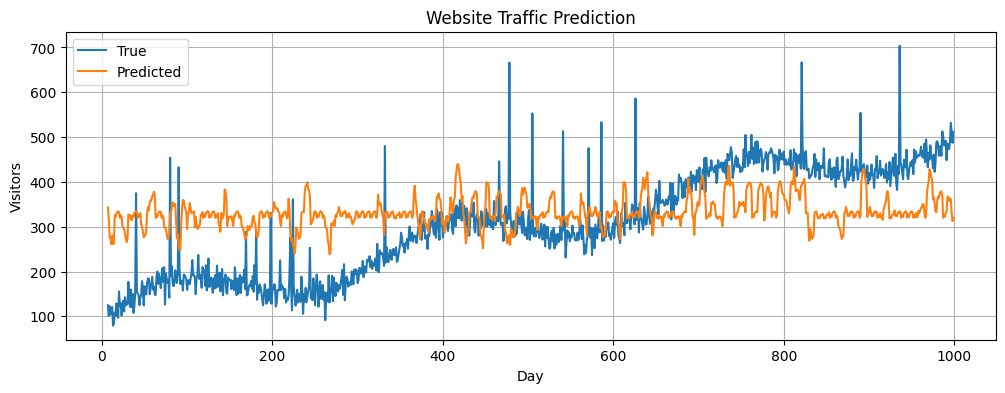


📊 Sample Prediction Results:
Day 1: True = 124.74 | Predicted = 343.02
Day 2: True = 101.33 | Predicted = 317.26
Day 3: True = 122.90 | Predicted = 277.68
Day 4: True = 104.11 | Predicted = 273.29
Day 5: True = 105.39 | Predicted = 261.00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# -------------------------------------
# 1. Load and preprocess the data
# -------------------------------------

def load_dataset(filepath):
    df = pd.read_csv(filepath)
    # Change 'Sequence' to 'Input_Sequence'
    return df['Input_Sequence'].tolist(), df['NextWord'].tolist()

def encode_features(df):
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    day_encoded = encoder.fit_transform(df[['Day_of_Week']])
    other_features = df[['Holiday', 'Promotion']].values
    full_features = np.hstack([day_encoded, other_features])
    return full_features, encoder

def normalize_targets(df):
    scaler = MinMaxScaler()
    visitors_scaled = scaler.fit_transform(df[['Visitors']])
    return visitors_scaled, scaler

# -------------------------------------
# 2. Sequence creation
# -------------------------------------
def create_sequences(features, targets, seq_len):
    X, y = [], []
    for i in range(len(features) - seq_len):
        X.append(features[i:i+seq_len])
        y.append(targets[i+seq_len])
    return np.array(X), np.array(y)

# -------------------------------------
# 3. Build LSTM model
# -------------------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# -------------------------------------
# 4. Plotting + Text Output
# -------------------------------------
def plot_and_print(model, X, y_true, scaler, seq_len):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    y_true = scaler.inverse_transform(y_true)

    plt.figure(figsize=(12, 4))
    plt.plot(range(seq_len, seq_len+len(y_true)), y_true, label="True")
    plt.plot(range(seq_len, seq_len+len(predictions)), predictions, label="Predicted")
    plt.title("Website Traffic Prediction")
    plt.xlabel("Day")
    plt.ylabel("Visitors")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n📊 Sample Prediction Results:")
    for i in range(5):
        print(f"Day {i+1}: True = {y_true[i][0]:.2f} | Predicted = {predictions[i][0]:.2f}")

# -------------------------------------
# 5. Main flow
# -------------------------------------
def main():
    filepath = "https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/refs/heads/main/website_traffic.csv"  # Replace with your CSV if running locally
    seq_len = 7

    df = load_data(filepath)
    features_raw, encoder = encode_features(df)
    visitors_scaled, scaler = normalize_targets(df)

    X, y = create_sequences(features_raw, visitors_scaled, seq_len)
    model = build_model(input_shape=(X.shape[1], X.shape[2]))
    model.fit(X, y, epochs=20, batch_size=8, verbose=1)
    plot_and_print(model, X, y, scaler, seq_len)

# 🔁 Run
if __name__ == "__main__":
    main()


🔥 Text RNN Applications:
---
Task	Description

🔡 Language Modeling	Predict next word/character

📝 Text Generation	Generate creative content (stories, poetry)

🌐 Translation	Sequence-to-sequence models

📥 Sentiment Analysis	Classify movie reviews, tweets

🧠 Chatbots	Understanding and replying

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/refs/heads/main/time_series_text.csv'

data = pd.read_csv(url)
data.head(10)

,Input_Sequence,Next_Word
0,Artificial,intelligence
1,Artificial intelligence,is
2,Artificial intelligence is,transforming
3,Artificial intelligence is transforming,industries
4,Machine,learning
5,Machine learning,models
6,Machine learning models,are
7,Machine learning models are,trained
8,Machine learning models are trained,on
9,Machine learning models are trained on,large


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ----------------------------------------
# 1. Tokenizer and Label Encoder Functions
# ----------------------------------------
def create_tokenizer(texts, vocab_size=1000):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
    tokenizer.fit_on_texts(texts)
    return tokenizer

def create_label_encoder(labels):
    encoder = LabelEncoder()
    encoded = encoder.fit_transform(labels)
    return encoded, encoder

# ----------------------------------------
# 2. Load & Prepare Dataset
# ----------------------------------------
def load_and_prepare_data(filepath, tokenizer, max_len=10):
    df = pd.read_csv(filepath)

    if 'Input_Sequence' not in df.columns or 'Next_Word' not in df.columns:
        raise ValueError("❌ Error: CSV must contain 'Input_Sequence' and 'Next_Word' columns.")

    input_sequences = tokenizer.texts_to_sequences(df['Input_Sequence'])
    input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

    return input_sequences, df['Next_Word']

# ----------------------------------------
# 3. Build Model
# ----------------------------------------
def build_model(vocab_size, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(vocab_size, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# ----------------------------------------
# 4. Train Model
# ----------------------------------------
def train_model(model, X_train, y_train, epochs=20, batch_size=16):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
    return model

# ----------------------------------------
# 5. Predict Next Word
# ----------------------------------------
def predict_next_word(model, tokenizer, label_encoder, seed_text, max_len=10):
    seq = tokenizer.texts_to_sequences([seed_text])
    padded = pad_sequences(seq, maxlen=max_len, padding='pre')
    pred = model.predict(padded, verbose=0)
    next_word_index = np.argmax(pred)
    next_word = label_encoder.inverse_transform([next_word_index])[0]
    return next_word

# ----------------------------------------
# 6. Main Function
# ----------------------------------------
def main():
    filepath = 'https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/refs/heads/main/time_series_text.csv'
    vocab_size = 1000
    max_len = 10

    df = pd.read_csv(filepath)
    tokenizer = create_tokenizer(df['Input_Sequence'], vocab_size)
    input_sequences, next_words_raw = load_and_prepare_data(filepath, tokenizer, max_len)
    next_words_encoded, label_encoder = create_label_encoder(next_words_raw)

    model = build_model(vocab_size=vocab_size, input_length=max_len)
    model = train_model(model, input_sequences, next_words_encoded)

    # 🔮 Test prediction
    test_sequence = "Machine learning models are trained"
    predicted = predict_next_word(model, tokenizer, label_encoder, test_sequence, max_len)
    print(f"📢 Given: '{test_sequence}' → Predicted next word: '{predicted}'")

# 🔁 Run script
if __name__ == "__main__":
    main()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.0112 - loss: 6.9056 - val_accuracy: 0.0312 - val_loss: 6.8904
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0286 - loss: 6.7921 - val_accuracy: 0.0312 - val_loss: 6.5551
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0311 - loss: 5.5995 - val_accuracy: 0.0312 - val_loss: 7.3589
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0338 - loss: 5.0902 - val_accuracy: 0.0938 - val_loss: 7.3853
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0229 - loss: 5.1242 - val_accuracy: 0.0938 - val_loss: 7.7964
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0192 - loss: 5.0018 - val_accuracy: 0.0938 - val_loss: 8.0744
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0278 - loss: 5.0284 - val_accuracy: 0.0938 - val_loss: 8.1174
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0339 - loss: 4.9847 - val_accuracy: 0.0312 - val_loss: 8.